In [2]:
import sys
sys.path.append('../../')

import numpy as np
from qiskit import IBMQ, Aer, QuantumCircuit
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, measurement_process_tomography, tomographic_gate_set_tomography
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel
from utils_plots import *
from utils_qiskit import *

In [3]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

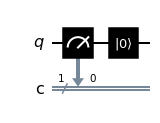

In [4]:
q1 = QuantumCircuit(1,1)
q1.measure(0,0)
q1.reset(0)
q1.draw( output='mpl' )

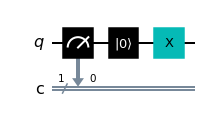

In [5]:
q2 = QuantumCircuit(1,1)
q2.measure(0,0)
q2.reset(0)
q2.x(0)
q2.draw( output='mpl' )

In [6]:
mpt1 = measurement_process_tomography( 1 )
mpt2 = measurement_process_tomography( 1 )
gst  = tomographic_gate_set_tomography( 1 )

In [7]:
circuits1 = mpt1.circuits(  )
circuits2 = mpt2.circuits( [ q1, q2 ] )
circuits3 = gst.circuits()

In [8]:
jobs = ['6335b371d95c8e323862e64a',
        '636d7951095607f4bf3cdce6',
        '636d7954949517f0afc2dbdc',
        '636d795d7a88f23fec94e022',
        '636d795ef2ca6af3a187615d']

In [9]:
backend = provider.get_backend('ibm_perth')

for k in range(5):
    results = backend.retrieve_job(jobs[k]).result()
    save_results( results, jobs[k], 'data' )

In [10]:
chois1      = []
chois2      = []
quantities1 = []
quantities2 = []

for k in range(5):
    results = load_results( jobs[k], 'data' )
    results_gate_set = gst.fit( results , Func=2  )

    gate_set = results_gate_set.gate_set()
    states, measurements = gst.gateset2spam( gate_set ) 
    
    results_tomo_1 = mpt1.fit( results, gate_set= [states, measurements], Func=2  )
    choi1 = results_tomo_1.chois[0]
    povm1  = results_tomo_1.povms[0]
    chois1.append( choi1 )
    quantities1.append( Quantities( povm1, choi1 ) )

    results_tomo_2 = mpt2.fit( results, gate_set= [states, measurements], Func=2  )
    choi2 = results_tomo_2.chois[0]
    povm2  = results_tomo_2.povms[0]
    chois2.append( choi2 )
    quantities2.append( Quantities( povm2, choi2 ) )

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


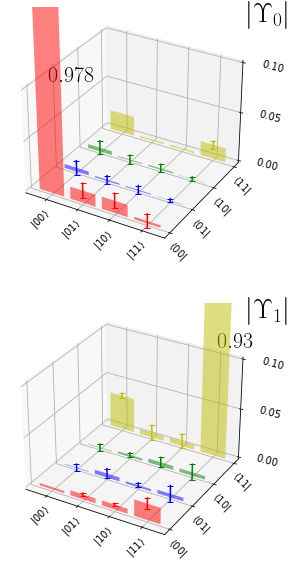

In [11]:
axes = Plot_Chois( np.mean( chois1, 0 ), np.std( chois1, axis=0 ), shape=(2,1)   )
set_ticks( axes, [0,1,2,3], ['$|00\\rangle$', '$|01\\rangle$', '$|10\\rangle$', '$|11\\rangle$'],
                    [0,1,2,3], ['$\\langle00|$', '$\\langle 01|$', '$\\langle 10|$', '$\\langle 11|$'] ,
                    (3.9,3,0.145), [ '$|\\Upsilon_0|$', '$|\\Upsilon_1|$' ]  )
plt.savefig( 'DM_v2.svg', bbox_inches='tight', transparent=True  )

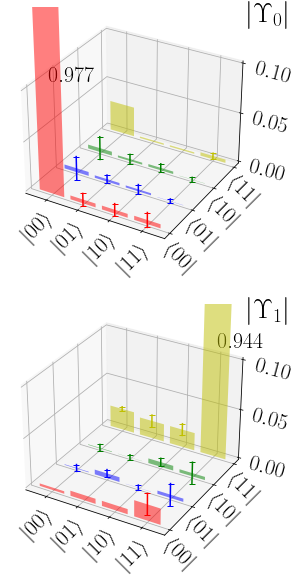

In [12]:
axes = Plot_Chois( np.mean( chois2, 0 ), np.std( chois2, axis=0 ), shape=(2,1)   )
set_ticks( axes, [0,1,2,3], ['$|00\\rangle$', '$|01\\rangle$', '$|10\\rangle$', '$|11\\rangle$'],
                    [0,1,2,3], ['$\\langle00|$', '$\\langle 01|$', '$\\langle 10|$', '$\\langle 11|$'] ,
                    (3.9,3,0.145), [ '$|\\Upsilon_0|$', '$|\\Upsilon_1|$' ]  )
plt.savefig( 'MRF_v2.svg', bbox_inches='tight', transparent=True  )

In [13]:
np.mean(quantities1,0), np.std(quantities1,0)

(array([0.9730799 , 0.9540136 , 0.96952188]),
 array([0.00145626, 0.00364348, 0.0047108 ]))

In [14]:
np.mean(quantities2,0), np.std(quantities2,0)

(array([0.97350548, 0.96039971, 0.97085315]),
 array([0.00215649, 0.00718388, 0.00759352]))